**непараметрическая регрессия**

Евгений Борисов esborisov@sevsu.ru

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

# данные

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
display( data.keys() )

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print( data['DESCR'] )

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
display( data['frame'].sample(3) )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
16663,3.0833,44.0,5.116705,0.940503,1036.0,2.370709,35.29,-120.67,2.19300
15170,3.1187,25.0,5.905292,1.061281,588.0,1.637883,33.01,-117.07,1.69400
6395,8.4889,40.0,6.878553,0.979328,1151.0,2.974160,34.14,-118.06,5.00001


---

https://geopandas.org/en/stable/getting_started/introduction.html

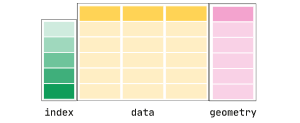

In [5]:
import geopandas as gpd

col_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

gdf = gpd.GeoDataFrame(
    data['frame'][col_features] ,
    columns=col_features,
    geometry=gpd.points_from_xy( data['frame']['Longitude'], data['frame']['Latitude'] ),  # longitude, latitude
    crs='epsg:4326'
)

display( gdf.sample(3) )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,geometry
15554,2.2146,31.0,3.956803,0.958963,1669.0,3.604752,1.167,POINT (-117.08000 33.11000)
5531,4.6176,44.0,5.883966,1.061181,3732.0,7.873418,3.523,POINT (-118.41000 33.97000)
5139,2.0754,39.0,4.077778,1.092063,2601.0,4.128571,1.014,POINT (-118.27000 33.97000)


In [6]:
del data

In [7]:
from shapely.geometry import MultiPoint

gpd.GeoDataFrame([{'geometry':MultiPoint(gdf['geometry'].tolist()).convex_hull,}],crs='EPSG:4326').explore()

In [8]:
gdf[['Population','geometry']].sample(100).explore()


----

In [10]:
# https://data.ca.gov/dataset/ca-geographic-boundaries -> CA Places Boundaries

In [17]:
# !ls data/ca-places-boundaries/
# !ls data/ca-state-boundary

In [16]:
# gpd.read_file('data/ca-state-boundary/CA_State_TIGER2016.dbf').explore()

In [ ]:
gpd.read_file('data/ca-places-boundaries/CA_Places_TIGER2016.dbf').explore()

In [86]:
# gpd.read_file('data/ca-places-boundaries/CA_Places_TIGER2016.shp').explore()


----

In [76]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Laiban/california_cities.csv/master/california_cities.csv'
df = pd.read_csv(url).iloc[:,1:]
# display( df.sample(3) )

col_features = ['city', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent']

gdf_calif = gpd.GeoDataFrame(
    df[col_features] ,
    columns=col_features,
    geometry=gpd.points_from_xy( df['longd'], df['latd'] ),  # longitude, latitude
    crs='epsg:4326'
)

del df

display( gdf_calif.sample(3) )

,city,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,geometry
360,Salinas,16.0,52.0,163665,23.217,23.179,0.038,60.131,60.033,0.099,0.16,POINT (-121.65556 36.67778)
456,Waterford,52.0,171.0,8456,2.369,2.328,0.041,6.135,6.030,0.105,1.72,POINT (-120.76750 37.64500)
254,McFarland,108.0,354.0,13745,2.668,2.668,0.000,6.910,6.910,0.000,0.00,POINT (-119.22917 35.67806)


In [78]:
gdf_calif.explore()


----

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap
# from matplotlib.colors import rgb2hex
# from matplotlib.patches import Polygon
# # Lambert Conformal map of lower 48 states.
# m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
#         projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# # draw state boundaries.
# # data from U.S Census Bureau
# # http://www.census.gov/geo/www/cob/st2000.html
# shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# # population density by state from
# # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# popdensity = {
# 'New Jersey':  438.00,
# 'Rhode Island':   387.35,
# 'Massachusetts':   312.68,
# 'Connecticut':    271.40,
# 'Maryland':   209.23,
# 'New York':    155.18,
# 'Delaware':    154.87,
# 'Florida':     114.43,
# 'Ohio':  107.05,
# 'Pennsylvania':  105.80,
# 'Illinois':    86.27,
# 'California':  83.85,
# 'Hawaii':  72.83,
# 'Virginia':    69.03,
# 'Michigan':    67.55,
# 'Indiana':    65.46,
# 'North Carolina':  63.80,
# 'Georgia':     54.59,
# 'Tennessee':   53.29,
# 'New Hampshire':   53.20,
# 'South Carolina':  51.45,
# 'Louisiana':   39.61,
# 'Kentucky':   39.28,
# 'Wisconsin':  38.13,
# 'Washington':  34.20,
# 'Alabama':     33.84,
# 'Missouri':    31.36,
# 'Texas':   30.75,
# 'West Virginia':   29.00,
# 'Vermont':     25.41,
# 'Minnesota':  23.86,
# 'Mississippi':   23.42,
# 'Iowa':  20.22,
# 'Arkansas':    19.82,
# 'Oklahoma':    19.40,
# 'Arizona':     17.43,
# 'Colorado':    16.01,
# 'Maine':  15.95,
# 'Oregon':  13.76,
# 'Kansas':  12.69,
# 'Utah':  10.50,
# 'Nebraska':    8.60,
# 'Nevada':  7.03,
# 'Idaho':   6.04,
# 'New Mexico':  5.79,
# 'South Dakota':  3.84,
# 'North Dakota':  3.59,
# 'Montana':     2.39,
# 'Wyoming':      1.96,
# 'Alaska':     0.42}
# # choose a color for each state based on population density.
# colors={}
# statenames=[]
# cmap = plt.cm.hot # use 'hot' colormap
# vmin = 0; vmax = 450 # set range.
# for shapedict in m.states_info:
#     statename = shapedict['NAME']
#     # skip DC and Puerto Rico.
#     if statename not in ['District of Columbia','Puerto Rico']:
#         pop = popdensity[statename]
#         # calling colormap with value between 0 and 1 returns
#         # rgba value.  Invert color range (hot colors are high
#         # population), take sqrt root to spread out colors more.
#         colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
#     statenames.append(statename)
# # cycle through state names, color each one.
# ax = plt.gca() # get current axes instance
# for nshape,seg in enumerate(m.states):
#     # skip DC and Puerto Rico.
#     if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
#         color = rgb2hex(colors[statenames[nshape]]) 
#         poly = Polygon(seg,facecolor=color,edgecolor=color)
#         ax.add_patch(poly)
# plt.title('Filling State Polygons by Population Density')
# plt.show()

In [48]:
# !pip3 install geodatasets
import geodatasets as gds

In [61]:
gds.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [60]:
# chicago = gpd.read_file(gds.get_path('geoda.chicago_commpop'))
# groceries = gpd.read_file(gds.get_path('geoda.groceries'))

In [59]:
list( gds.data.flatten().keys() )

['geoda.airbnb',
 'geoda.atlanta',
 'geoda.cars',
 'geoda.charleston1',
 'geoda.charleston2',
 'geoda.chicago_health',
 'geoda.chicago_commpop',
 'geoda.chile_labor',
 'geoda.cincinnati',
 'geoda.cleveland',
 'geoda.grid100',
 'geoda.groceries',
 'geoda.guerry',
 'geoda.health',
 'geoda.health_indicators',
 'geoda.hickory1',
 'geoda.hickory2',
 'geoda.home_sales',
 'geoda.houston',
 'geoda.juvenile',
 'geoda.lansing1',
 'geoda.lansing2',
 'geoda.lasrosas',
 'geoda.liquor_stores',
 'geoda.malaria',
 'geoda.milwaukee1',
 'geoda.milwaukee2',
 'geoda.ncovr',
 'geoda.natregimes',
 'geoda.ndvi',
 'geoda.nepal',
 'geoda.nyc',
 'geoda.nyc_earnings',
 'geoda.nyc_education',
 'geoda.nyc_neighborhoods',
 'geoda.orlando1',
 'geoda.orlando2',
 'geoda.oz9799',
 'geoda.phoenix_acs',
 'geoda.police',
 'geoda.sacramento1',
 'geoda.sacramento2',
 'geoda.savannah1',
 'geoda.savannah2',
 'geoda.seattle1',
 'geoda.seattle2',
 'geoda.sids',
 'geoda.sids2',
 'geoda.south',
 'geoda.spirals',
 'geoda.stlouis',

In [54]:
# groceries.explore()

In [55]:
# chicago.explore() # _california_housing

In [57]:
geodatasets.get_path?

In [56]:
california = gpd.read_file(geodatasets.get_path('geoda.california_commpop'))


ValueError: No matching item found for the query 'geoda.california_commpop'.

----

In [29]:
# !mkdir -p tmp

In [25]:
# import folium

# my_map = folium.Map()

# folium.Choropleth(
#     geo_data=gdf,
#     name='choropleth',
#     data=gdf,
#     columns=['Population'],
#     #columns=['Country/Dependency', 'kg/person (2009)[10]'],
#     #key_on='feature.properties.name',
#     #fill_color='OrRd',
#     #fill_opacity=.7,
#     #line_opacity=.2,
#     #legend_name='Meat consumption in kg/person'
# ).add_to(my_map)

# my_map # .save('tmp/meat.html')

----

In [ ]:
# n_samples=500
# X = np.linspace(-1,2,n_samples).reshape(-1,1)
# y = np.sin(X*2.9)+np.cos(X*5.9)+rng.rand(n_samples).reshape(-1,1)
# display( X.shape,y.shape )

In [ ]:
# # рисуем исходные данные
# plt.figure(figsize=(5,4)) # размер картинки
# plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
# plt.grid()
# plt.show()

# модель регрессии

In [ ]:
# прямоугольное ядро
def kernel_rect(x): return np.abs(x)<=1.0

# треугольное ядро
def kernel_tri(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
def kernel_square(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def kernel_gauss(x): return np.exp(-2.0*np.square(x))

In [ ]:
x = np.linspace(-2.,2,100)
kernels = [ kernel_rect,kernel_tri,kernel_square,kernel_gauss ]
fig,ax = plt.subplots(1,len(kernels),figsize=(11,2),sharey=True,sharex=True)
for n,k in enumerate(kernels):
    ax[n].plot(x,k(x))
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title(k.__name__)
plt.show()

---

непараметрическая (ядерная) регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

class KernelRegression:
    
    def __init__( self, kernel=kernel_gauss, metric=euclidean_distances, h=.2 ):
        self._metric = metric
        self._kernel = kernel # ядро влияет на на гладкость аппроксимации
        self._h = h # ширина окна, влияет на точность аппроксимации
        self._X = np.array([])
        self._y = np.array([])
        
    def fit(self,X,y):  
        assert len(X.shape)==2
        assert len(X)==len(y)  
        self._X = X
        self._y = y
        return self

    def predict(self,x):
        assert len(self._X)>1
        assert self._X.shape[1]==x.shape[1]
        d = self._metric( x, self._X )
        w = self._kernel(d/self._h) 
        return (self._y.T*w).sum(axis=1)/w.sum(axis=1) # значение регресии        

In [ ]:
model = KernelRegression().fit(X,y) # обучаем модель

## тестируем

In [ ]:
from sklearn.metrics import mean_squared_error

display( mean_squared_error( y_true=y, y_pred = model.predict(X) ) )

----

In [ ]:
# генерируем сетку, для которой будем считать регрессию
n = n_samples//10 # количество
u = np.linspace(X.min(),X.max(),n).reshape(-1,1)
display( u.shape )

predicted = model.predict(u) # значение регрессии

# рисуем результат
plt.figure(figsize=(5,4)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,predicted,c='r') # значение регрессии
plt.grid()
plt.show()

---

In [ ]:
# !pip3 install watermark

In [ ]:
%load_ext watermark
%watermark --python
%watermark --iversions

In [40]:
# data['frame'].columns

In [34]:
# display( data['feature_names'] )
# display( data['target_names'] )

In [35]:
# col_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal']
# col_coo  = [ 'Latitude','Longitude']
# X, coo, y = data['data'][:,:-2],data['data'][:,-2:], data['target']
# display(X.shape,y.shape,coo.shape)